# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
graph_df = pd.read_csv('/content/graph.csv')
content_df = pd.read_csv('/content/content.csv')

Create a directed graph

In [4]:
G = nx.from_pandas_edgelist(graph_df, source='Source', target='Target', create_using=nx.DiGraph())

Load contents into a dictionary

In [5]:
url_to_content = dict(zip(content_df['URL'], content_df['Content']))

# Task 02: Visualize the graph using networkx



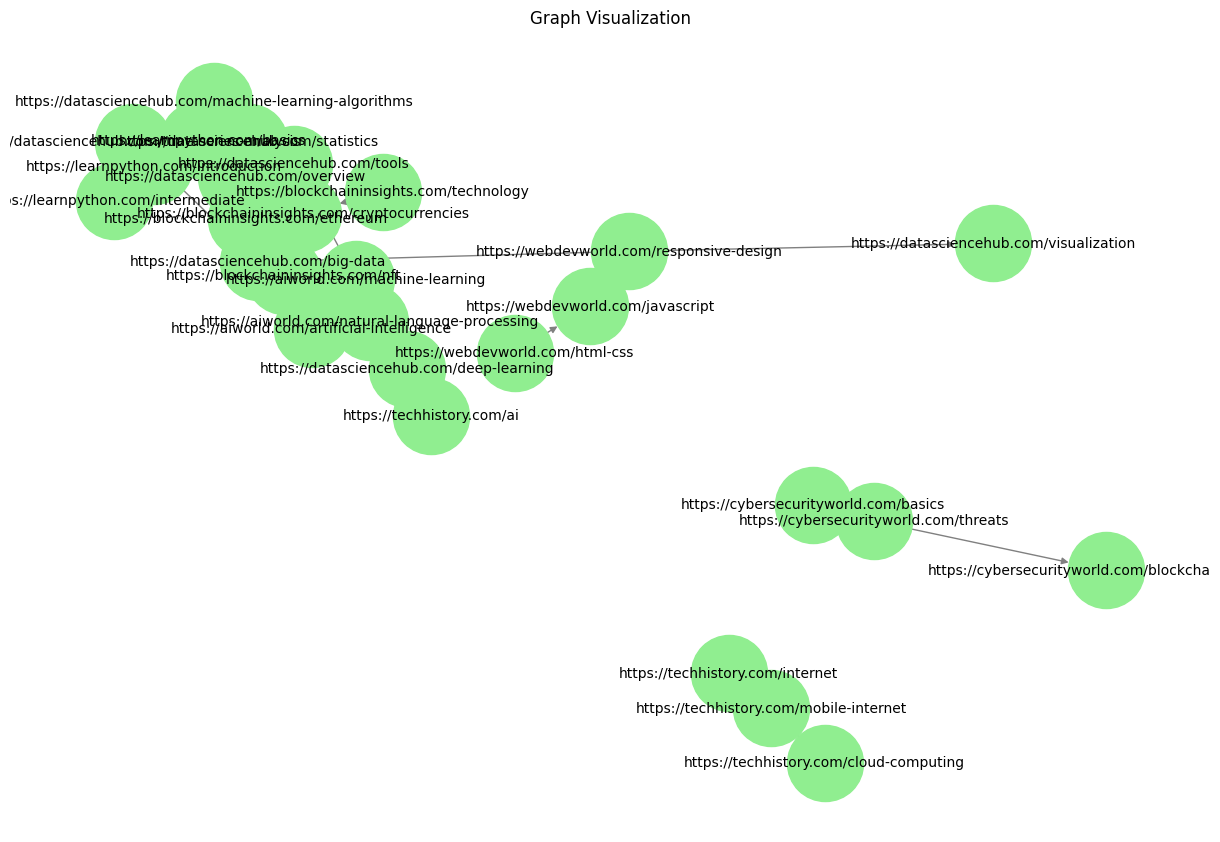

In [24]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, edge_color='gray', font_size=10)
plt.title("Graph Visualization")
plt.show()

# Task 03 (Bonus): Tokenize and clean contents

In [7]:
import nltk

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
stop_words = set(stopwords.words('english'))
processed_content = {}

# Tokenize and remove stopwords
for url, content in url_to_content.items():
    tokens = word_tokenize(content.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric words
    processed_content[url] = filtered_tokens

# Task 04: Build an inverted index

In [16]:
# Create the inverted index
inverted_index = defaultdict(list)

for url, tokens in processed_content.items():
    for token in tokens:
        inverted_index[token].append(url)

# Check if the inverted_index has been correctly created
print(f"Inverted Index created with {len(inverted_index)} tokens.")

Inverted Index created with 201 tokens.


# Task 05: Single word query-based search system

In [17]:
pagerank_scores = nx.pagerank(G)

def single_word_query(query):
    query = query.lower()
    if query in inverted_index:
        result_urls = inverted_index[query]
        ranked_urls = sorted(result_urls, key=lambda url: pagerank_scores.get(url, 0), reverse=True)
        return ranked_urls
    else:
        return []

In [18]:
query = "Python"
print(f"Results for single word query '{query}':", single_word_query(query))

Results for single word query 'Python': ['https://datasciencehub.com/tools', 'https://learnpython.com/basics', 'https://learnpython.com/basics', 'https://learnpython.com/introduction', 'https://learnpython.com/introduction']


# Task 06 (Bonus): Bag of words query-based search system



In [19]:
def bag_of_words_query(query):
    query_tokens = [word.lower() for word in word_tokenize(query) if word.isalnum()]
    result_urls = set()
    for token in query_tokens:
        if token in inverted_index:
            result_urls.update(inverted_index[token])
    ranked_urls = sorted(result_urls, key=lambda url: pagerank_scores.get(url, 0), reverse=True)
    return ranked_urls

In [20]:
query = "Python Java"
print(f"Results for bag of words query '{query}':", bag_of_words_query(query))

Results for bag of words query 'Python Java': ['https://datasciencehub.com/tools', 'https://learnpython.com/basics', 'https://learnpython.com/introduction']
